In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.stats as stats

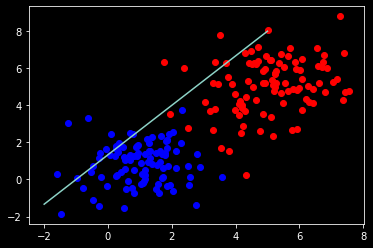

In [44]:
mean1=np.array((1,1))
cov1 = np.array(([1,0],[0,1]))
x1,y1 = np.random.multivariate_normal(mean1,cov1,100).T
plt.plot(x1,y1,'bo')

mean2=np.array((5,5))
cov2 = np.array(([2,0],[0,2]))
x2,y2 = np.random.multivariate_normal(mean2,cov2,100).T
plt.plot(x2,y2,'ro')

mCov = cov2 + cov1
inmCov = np.linalg.inv(mCov)
line = np.dot(inmCov,(mean2-mean1))

x = range(-2,6)
y = line[0]*x+line[1]
plt.plot(x,y)

now projected mu1 and sigma1 [mu2 sigma2] are:

In [45]:
pmu1 = np.dot(line.T,mean1)
pmu2 = np.dot(line.T,mean2)
print(pmu1,pmu2)

2.6666666666666665 13.333333333333332


In [46]:
psigma1 = np.dot(line.T,cov1,line)
psigma2 = np.dot(line.T,cov2,line)
print(psigma1,psigma2)

[2.66666667 2.66666667] [2.66666667 2.66666667]


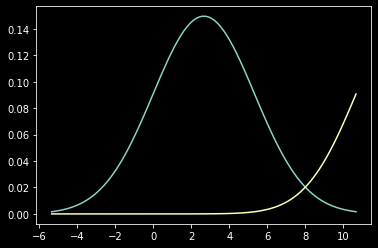

In [60]:
x = np.linspace(pmu1-3*psigma1[0], pmu1+3*psigma1[0],100)
y1 = stats.norm.pdf(x,pmu1,psigma1[0])
y2 = stats.norm.pdf(x,pmu2,psigma2[0])
plt.plot(x,y1)
plt.plot(x,y2)

Lets test with sklearn algorithm

In [57]:
XM1 = np.hstack((x1.T,y1.T))
XM2 = np.hstack((x2.T,y2.T))
XM = np.vstack((XM1,XM2))

In [59]:
YM = np.vstack((np.zeros((100,1)), np.ones((100,1))))
print(XM.shape, YM.shape)

(2, 200) (200, 1)
